In [2]:
import healpy as h
import sys  ; sys.path.append("../../codes/")
from modules_v2 import euler as euler
from modules_v2 import rs_rad_ker as rk
from scipy.interpolate import interp1d

%pylab notebook

figpath="../../figures/kernel_telescoping/"
!mkdir $figpath

Populating the interactive namespace from numpy and matplotlib
mkdir: ../../figures/kernel_telescoping/: File exists


# Evaluating the radial kernels.

In [3]:
sampling=6000 ; lmaxh=1024 ; lmaxl=512

theta,pl2=rk.get_plm0(lmaxh,sampling,theta_max=10.*pi/180.)

rad_kerh=rk.calc_qu2eb_rad_ker(lmaxh,theta,pl2)
rad_ker_ih,rad_ker_dh=rk.calc_qu2queb_rad_ker(lmaxh,theta,pl2)

rad_kerl=rk.calc_qu2eb_rad_ker(lmaxl,theta,pl2)
rad_ker_il,rad_ker_dl=rk.calc_qu2queb_rad_ker(lmaxl,theta,pl2)

# Telescoping behaviour of ${}_{\mathcal{M}}f$

<IPython.core.display.Javascript object>


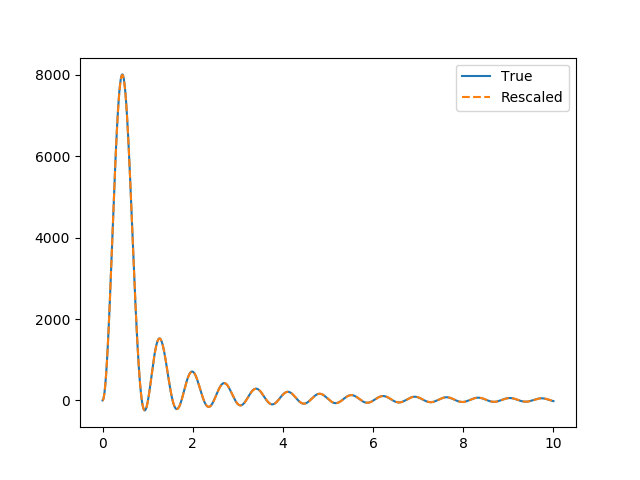

<IPython.core.display.Javascript object>


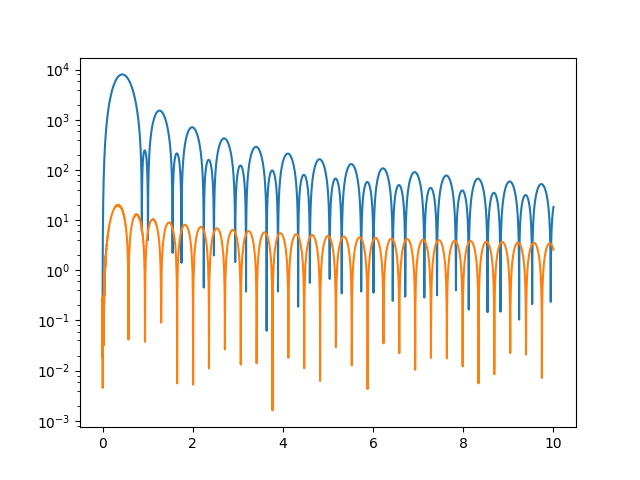

[]

In [6]:
fn_l=interp1d(theta,rad_kerl)
fn_h=interp1d(theta,rad_kerh)

figure()
plot(theta*180./pi,fn_l(theta),label="True")
plot(theta*180./pi,fn_h(theta*lmaxl/lmaxh)*(lmaxl*1./lmaxh)**2.,"--",label="Rescaled")
legend(loc=0)

figure()
plot(theta*180./pi,abs(fn_l(theta)),label="True")
plot(theta*180./pi,abs(fn_l(theta) - fn_h(theta*lmaxl/lmaxh)*(lmaxl*1./lmaxh)**2.))
semilogy()
#ylim(-1,1)

# Telescoping behaviour of ${}_{\mathcal{I}}f$

In [ ]:
fn_l=interp1d(theta,rad_ker_il)
fn_h=interp1d(theta,rad_ker_ih)

figure()
plot(theta*180./pi,fn_l(theta),label="True")
plot(theta*180./pi,fn_h(theta*lmaxl/lmaxh)*(lmaxl*1./lmaxh)**2.,"--",label="Rescaled")
legend(loc=0)

figure()
plot(theta*180./pi,abs(fn_l(theta) - fn_h(theta*lmaxl/lmaxh)*(lmaxl*1./lmaxh)**2.))
semilogy()
#ylim(-1,1)

# Telescoping behaviour of ${}_{\mathcal{D}}f$

In [ ]:
fn_l=interp1d(theta,rad_ker_dl)
fn_h=interp1d(theta,rad_ker_dh)

figure()
plot(theta*180./pi,fn_l(theta),label="True")
plot(theta*180./pi,fn_h(theta*lmaxl/lmaxh)*(lmaxl*1./lmaxh)**2.,"--",label="Rescaled")
legend(loc=0)

figure()
plot(theta*180./pi,(fn_l(theta) - fn_h(theta*lmaxl/lmaxh)*(lmaxl*1./lmaxh)**2.))
#ylim(-1,1)